In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import category_encoders as ce

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
df=pd.read_csv("Dataset.csv")
print("There are {} records for {} attributes".format(df.shape[0],df.shape[1]))

There are 300153 records for 12 attributes


In [4]:
df.head(7)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.describe(include="all")

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


<AxesSubplot:xlabel='price'>

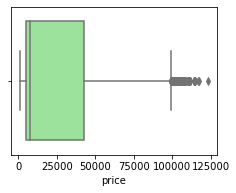

In [8]:
plt.figure(figsize=(17,6))
plt.subplot(2,4,8)
sns.boxplot(x='price',data=df,color='lightgreen')

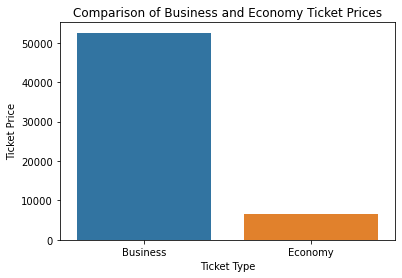

In [9]:
class_df=df.groupby('class').apply(lambda df:df.price.mean())
class_df=class_df.to_frame().reset_index()
sns.barplot(data=class_df,x='class',y=0)
plt.xlabel("Ticket Type")
plt.title("Comparison of Business and Economy Ticket Prices")
plt.ylabel("Ticket Price")
plt.show()

<AxesSubplot:xlabel='days_left', ylabel='price'>

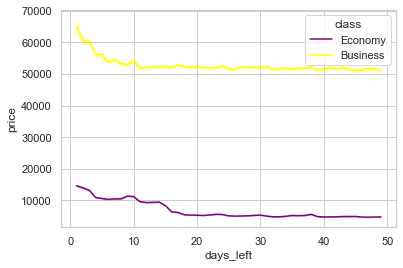

In [10]:
sns.set(style="whitegrid")
sns.lineplot(data=df,x='days_left',y='price',palette=['purple','yellow'],hue='class')

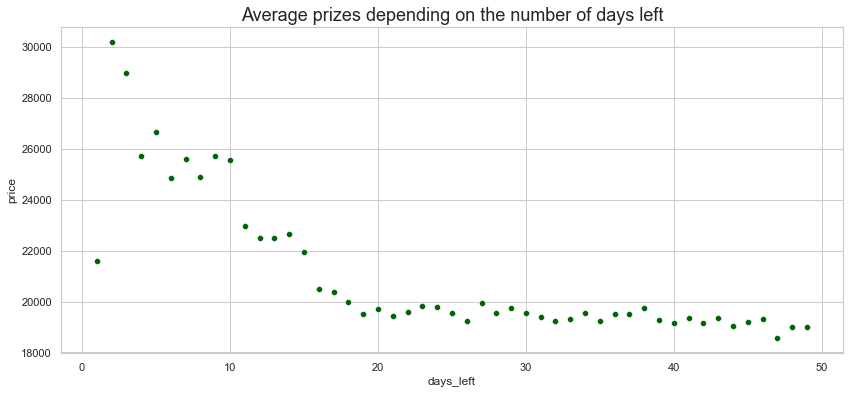

In [11]:
df_temp=df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x="days_left", y="price",color="darkgreen",data=df_temp).set_title("Average prizes depending on the number of days left",fontsize=18)

Text(0.5, 1.0, 'Based on the departure time')

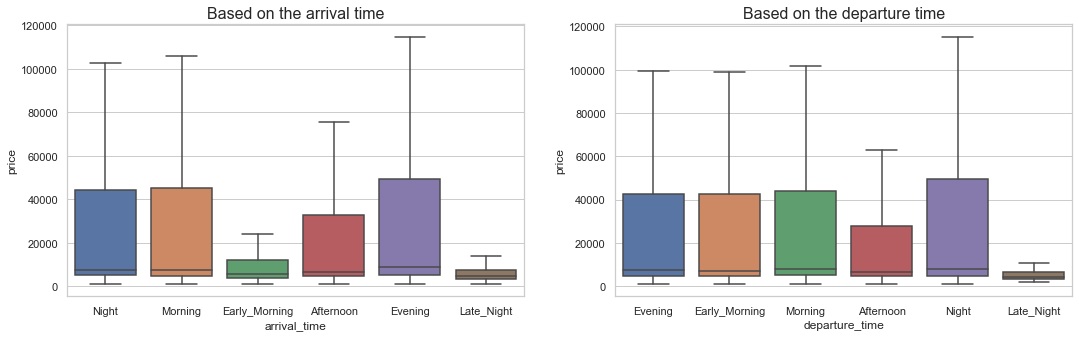

In [12]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="arrival_time",showfliers=False).set_title("Based on the arrival time",fontsize=16)
plt.subplot(1,2,2)
sns.boxplot(data=df,y="price",x="departure_time",showfliers=False).set_title("Based on the departure time",fontsize=16)

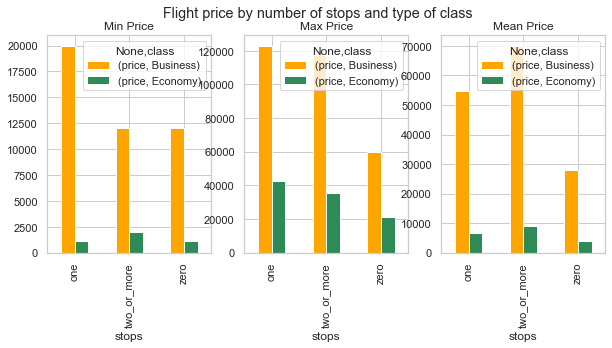

In [13]:
min_stop=df.groupby(["stops","class"]).price.min().to_frame()
max_stop=df.groupby(["stops","class"]).price.max().to_frame()
mean_stop=df.groupby(["stops","class"]).price.mean().to_frame()

fig,axs=plt.subplots(1,3,figsize=(10, 4))
min_stop.unstack().plot(kind='bar',ax=axs[0],title="Min Price",color=['orange','seagreen'])
max_stop.unstack().plot(kind='bar',ax=axs[1],title="Max Price",color=['orange','seagreen'])
mean_stop.unstack().plot(kind='bar',ax=axs[2],title="Mean Price",color=['orange','seagreen'])
plt.suptitle("Flight price by number of stops and type of class")
plt.show()

In [14]:
t=ce.TargetEncoder(cols=['airline','source_city','departure_time','stops','arrival_time','destination_city','class'])
df=t.fit_transform(df,df['price'])
df=df.drop(['Unnamed: 0','flight'],axis=1)
name=df.columns
serial=df.index
scale=MinMaxScaler((0,1))
df=scale.fit_transform(df)
data_scaled=pd.DataFrame(df,columns=name,index=serial)
data_scaled.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.079383,0.0,0.867088,0.0,0.876048,0.833363,0.0,0.027347,0.0,0.039749
1,0.079383,0.0,0.804496,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039749
2,0.000000,0.0,0.804496,0.0,0.315340,0.833363,0.0,0.027347,0.0,0.039773
3,1.000000,0.0,0.896027,0.0,0.613097,0.833363,0.0,0.028980,0.0,0.039765
4,1.000000,0.0,0.896027,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039765


In [15]:
X=data_scaled.drop('price',axis=1)
Y=data_scaled['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)

In [16]:
reg=RandomForestRegressor(max_depth=21,random_state=35,n_estimators=300)
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)

reg_score=reg.score(X_test,Y_test)
reg_mae=mean_absolute_error(Y_test,Y_pred)
reg_r2=r2_score(Y_test,Y_pred)

print("Accuracy:",reg_score)
print("Mean Absolute Error:",reg_mae)
print("R squared:",reg_r2)

Accuracy: 0.9821773770214435
Mean Absolute Error: 0.01235939554543453
R squared: 0.9821773770214435


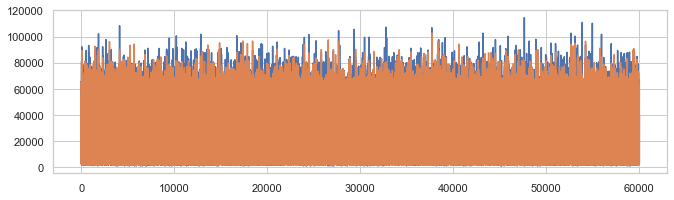

In [17]:
obs1=pd.DataFrame(np.concatenate((X_test,Y_pred.reshape(-1, 1)),axis=1))
obs1=scale.inverse_transform(obs1)
obs1=pd.DataFrame(obs1)

obs2=pd.DataFrame(np.concatenate((X_test,Y_test.values.reshape(-1, 1)),axis=1))
obs2=scale.inverse_transform(obs2)
obs2=pd.DataFrame(obs2)

result=pd.concat([obs2.iloc[:, 9],obs1.iloc[:, 9]],axis=1)
result.columns=['true','pred']
plt.figure(figsize=(11,3))
plt.plot(result['true'])
plt.plot(result['pred'])

In [29]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
X=data_scaled.drop('price',axis=1)
Y=data_scaled['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)
linear=LinearRegression() 
linear.fit(X_train,Y_train)
Y_pred=linear.predict(X_test)
accuracy=reg.score(X_test,Y_test)
error=metrics.r2_score(Y_test,Y_pred) 
print("Accuracy:",accuracy) 
print("R Squared Error:",error)

Accuracy: 0.9821773770214435
R Squared Error: 0.903639103176046
